# Project: Investigating Soccer Database

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this database i will deal with several datasets, e.g.(**players' names & attributes, teams' names & attributes, top european leagues and results**), and i will do my best with these datasets to answer the following **questions**.
>
### Question (1):

> **During the database period(2007-2016), who is the (fastest player, best dribbler, best free kick taker and best player) ?**
>
### Question (2):

> **What is the relation between being a good attacker and having high finishing and ball control?**
>
### Question (3):

> **How do the fudamental attributes(sprint speed, heading accuracy, short passing and ball control) affect top attackers and top defenders?**
> 
### Question (4):

> **What are the top 5 English Premier League teams during the database period?**
>
### Question (5):

> **What attributes makes a team the most victorious in English Premier League?**
>
### Question (6):

> **How did chance creation by shooting change over time ?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
df_country = pd.read_csv("Country.csv")
df_league = pd.read_csv("League.csv")
df_matches = pd.read_csv("Match.csv")
df_player = pd.read_csv("Player.csv")
df_player_att = pd.read_csv("Player_Attributes.csv")
df_team = pd.read_csv("Team.csv")
df_team_att = pd.read_csv("Team_Attributes.csv")

In [3]:
df_league.head(2)

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League


In [4]:
df_league.name.nunique()

11

In [5]:
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


> We have **11 leagues** with **no** Nan values

In [6]:
df_player.head(2)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146


In [7]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [8]:
df_player.player_name.nunique()

10848

> We have **10848 players** with **no** Nan values

In [9]:
df_team.head(2)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC


In [10]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [11]:
df_team.team_long_name.nunique()

296

> We have **296 teams**, some Nan values in the team_fifa_api_id column which we can neglect

In [12]:
df_player_att.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


In [13]:
df_player_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [14]:
df_player_att.date.nunique()

197

> Player attributes dataset **contains** Nan values.
>
> There are **197 unique** date values, so i won't compare attributes over time

In [15]:
df_team_att.head(2)

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover


In [16]:
df_team_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

In [17]:
df_team_att.date.nunique()

6

> Around **two thirds of the buildUpPlayDribbling are Nan values**, so it is more logic to neglect this column.
>
> There are only **6 unique date values**, so i will consider filtering by date during analysis.

### Data Cleaning (removing rows containing Nan values):

In [18]:
# Removing Nan values from df_team:-

df_player_att.dropna(inplace=True)

# Checking:
df_player_att.isnull().sum().any()

False

In [19]:
# Renaming the team attributes columns to be in complete lowercase:

df_team_att.rename(columns = lambda x: x.lower(), inplace=True)

# Checking:

df_team_att.head(1)

,id,team_fifa_api_id,team_api_id,date,buildupplayspeed,buildupplayspeedclass,buildupplaydribbling,buildupplaydribblingclass,buildupplaypassing,buildupplaypassingclass,...,chancecreationshooting,chancecreationshootingclass,chancecreationpositioningclass,defencepressure,defencepressureclass,defenceaggression,defenceaggressionclass,defenceteamwidth,defenceteamwidthclass,defencedefenderlineclass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


In [20]:
# Removing the buildupplaydribbling column from the team attributes dataframe as its most values are Nans:

df_team_att.drop("buildupplaydribbling", axis=1, inplace=True)

#checking:

df_team_att.head(1)

,id,team_fifa_api_id,team_api_id,date,buildupplayspeed,buildupplayspeedclass,buildupplaydribblingclass,buildupplaypassing,buildupplaypassingclass,buildupplaypositioningclass,...,chancecreationshooting,chancecreationshootingclass,chancecreationpositioningclass,defencepressure,defencepressureclass,defenceaggression,defenceaggressionclass,defenceteamwidth,defenceteamwidthclass,defencedefenderlineclass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,Little,50,Mixed,Organised,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 : During the database period(2007-2016), who is the (fastest player, best dribbler, best free kick taker and best player) ? 


### First

> **I have to insert player names in the player attributes dataframe**

In [21]:
# Creating player name index:

player_names = df_player.set_index("player_api_id")

In [22]:
player_names.head(1)

,id,player_name,player_fifa_api_id,birthday,height,weight
player_api_id,,,,,,
505942,1,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187


In [23]:
player_names = player_names["player_name"]

In [24]:
# converting player_api_id column to player_name column in player attributes dataframe:

df_player_att["player_api_id"] = df_player_att["player_api_id"].apply(lambda x: player_names[x])

df_player_att = df_player_att.rename(columns = {"player_api_id":"player_name"})

In [25]:
# Checking:

df_player_att.head()

,id,player_fifa_api_id,player_name,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,Aaron Appindangoye,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,Aaron Appindangoye,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,Aaron Appindangoye,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,Aaron Appindangoye,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,Aaron Appindangoye,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


### Second

> **I have to group by player names to get the best players**

In [26]:
# Creating player attributes dataframe filtered by player names:

player_attributes = df_player_att.groupby("player_name").mean()

In [27]:
# Getting fastest player name:

fastest_player = player_attributes[player_attributes["sprint_speed"] == player_attributes["sprint_speed"].max()].index[0]
fastest_player

'Theo Walcott'

In [28]:
# Getting best dribbler name:

best_dribbler = player_attributes[player_attributes["dribbling"] == player_attributes["dribbling"].max()].index[0]
best_dribbler

'Lionel Messi'

In [29]:
# Getting best free kick taker:

best_fk_taker = player_attributes[player_attributes["free_kick_accuracy"] == player_attributes["free_kick_accuracy"].max()].index[0]
best_fk_taker

'Andrea Pirlo'

In [30]:
# Getting best player:

best_player = player_attributes[player_attributes["overall_rating"] == player_attributes["overall_rating"].max()].index[0]
best_player

'Lionel Messi'

### Research Question 2 : What is the relation between being a good attacker and having high finishing and ball control?

**Assume attacking players are players with high attacking work rate**

In [31]:
# Extracting attacking players from the player attributes dataframe:

attackers_attributes = df_player_att.query("attacking_work_rate == 'high'")

> **I will use scatter plot to find the relation between being good attacker and having high finishing and ball control**

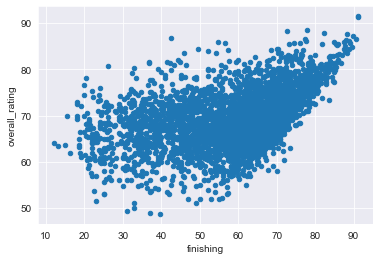

In [32]:
attackers_attributes.groupby("player_name").mean().plot(x="finishing", y="overall_rating", kind="scatter");

> **According to the scatter plot above, you can see that players with finishing less than 60 can either be good or average players, while only good players have finishing more than 60, and you can see top players with finishing more than 80**

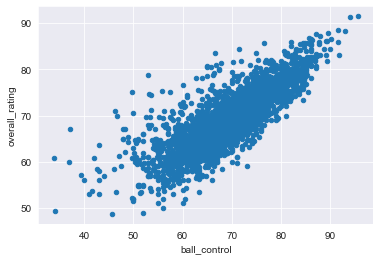

In [33]:
attackers_attributes.groupby("player_name").mean().plot(x="ball_control", y="overall_rating", kind="scatter");

> **Unlike finishing, we can see here that as long as the player has more ball control he gets better.**

### Research Question 3 : How do the fudamental attributes(sprint speed, heading accuracy, short passing and ball control) affect top attackers and top defenders?

### First:

>**I need to exctract the top players dataframe**

In [34]:
df_player_att.overall_rating.describe()

count    180354.000000
mean         68.635317
std           7.027950
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

> **Above, we can see that only 25 % of the players have more than 73 overall rating, so we can consider them top players**

In [35]:
# Getting top players:

top_players = df_player_att.query("overall_rating > 73")

### Second:

> **I need to extract top attackers and top defenders dataframes**

In [36]:
# Getting top attackers:

top_attackers = top_players.query("attacking_work_rate == 'high'")

In [37]:
# Getting top defenders:

top_defenders = top_players.query("defensive_work_rate == 'high'")

### Third:

> **plot the needed attributes for both top attackers and top defenders together to see the difference**

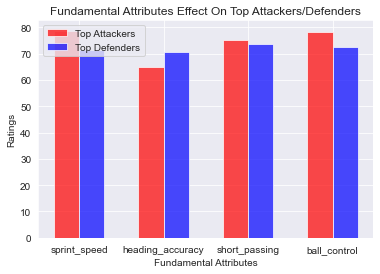

In [39]:
top_attackers_att = top_attackers[["sprint_speed", "heading_accuracy", "short_passing", "ball_control"]].mean()

top_defenders_att = top_defenders[["sprint_speed", "heading_accuracy", "short_passing", "ball_control"]].mean()

width = 0.3

ind = np.arange(len(top_attackers_att))

attackers_bars = plt.bar(ind, top_attackers_att, width, color="r", alpha=0.7, label="Top Attackers")

defenders_bars = plt.bar(ind + width, top_defenders_att, width, color="b", alpha=0.7, label="Top Defenders")

plt.xlabel("Fundamental Attributes")

plt.ylabel("Ratings")

plt.title("Fundamental Attributes Effect On Top Attackers/Defenders")

locations = ind + width/2

labels = top_attackers_att.index

plt.xticks(locations, labels)

plt.legend()

### From the above plot we can conclude:

- Top Attackers have more sprint speed and ball control
- Top Defenders have more heading accuracy
- Having high short passing rate is essential to be a top player wether attacker or defender

### Research Question 4 : What are the top 5 English Premier League teams during the database period?

### To answer the above question i need to:

- Create a winner column in matches dataframe that defines the winner team for each match
- Then extract the english premier league matches
- Finally extract the top 5 teams (the 5 teams that won the most)

### First:

> **Create winner column in matches dataframe**

In [40]:
# Selecting needed columns only:

needed_columns = ["league_id", "date", "home_team_api_id", "away_team_api_id", "home_team_goal", "away_team_goal"]
df_matches = df_matches[needed_columns]

In [41]:
# Checking:

df_matches.head(1)

,league_id,date,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,2008-08-17 00:00:00,9987,9993,1,1


In [42]:
# Extract the rows with home team winner:

home_winner = df_matches.query("home_team_goal > away_team_goal")

In [43]:
# Extract the rows with away team winner:

away_winner = df_matches.query("home_team_goal < away_team_goal")

In [44]:
# Add the winner column for both dataframes:

home_winner["winner"] = home_winner["home_team_api_id"]

away_winner["winner"] = away_winner["away_team_api_id"]

<ipython-input-44-89d4af0efa88>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_winner["winner"] = home_winner["home_team_api_id"]
<ipython-input-44-89d4af0efa88>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_winner["winner"] = away_winner["away_team_api_id"]


In [45]:
# Append both dataframes:

winner_teams = home_winner.append(away_winner)

In [46]:
# Select needed columns only:

winner_teams = winner_teams[["league_id", "date", "winner"]]

In [47]:
# Checking:

winner_teams.head()

,league_id,date,winner
3,1,2008-08-17 00:00:00,9991
8,1,2008-08-16 00:00:00,10001
9,1,2008-11-01 00:00:00,8342
21,1,2008-11-07 00:00:00,9984
25,1,2008-11-08 00:00:00,10001


### Second:

> **I need to create the team names index and exchange the winner team id with winner team name**

In [48]:
# Create team names index:

team_names = df_team.set_index("team_api_id")

team_names = team_names["team_long_name"]

In [49]:
# Checking:

team_names.head()

team_api_id
9987              KRC Genk
9993          Beerschot AC
10000     SV Zulte-Waregem
9994      Sporting Lokeren
9984     KSV Cercle Brugge
Name: team_long_name, dtype: object

In [50]:
# Exchange winner team id with winner team name:

winner_teams["winner"] = winner_teams["winner"].apply(lambda x: team_names[x])

In [51]:
# Checking:

winner_teams.head()

,league_id,date,winner
3,1,2008-08-17 00:00:00,KAA Gent
8,1,2008-08-16 00:00:00,KVC Westerlo
9,1,2008-11-01 00:00:00,Club Brugge KV
21,1,2008-11-07 00:00:00,KSV Cercle Brugge
25,1,2008-11-08 00:00:00,KVC Westerlo


### Third:

> **I need to extract the English Premier League matches**

In [52]:
# Getting the league id of the english premier league:

df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


In [53]:
# Extracting all matches with league id = 1729 to create the epl winners:

epl_winners = winner_teams.query("league_id == 1729")

In [54]:
# Checking:

epl_winners.head()

,league_id,date,winner
1729,1729,2008-08-16 00:00:00,Arsenal
1731,1729,2008-08-16 00:00:00,West Ham United
1732,1729,2008-08-17 00:00:00,Aston Villa
1734,1729,2008-08-16 00:00:00,Middlesbrough
1735,1729,2008-08-16 00:00:00,Bolton Wanderers


### Fourth:

> **I get the top 5 epl teams using `.value_counts()`**

In [55]:
top_5_epl = epl_winners["winner"].value_counts()[:5].index

In [56]:
# Checking:

top_5_epl

Index(['Manchester United', 'Chelsea', 'Manchester City', 'Arsenal',
       'Tottenham Hotspur'],
      dtype='object')

### Research Question 5 : What attributes makes a team the most victorious in English Premier League?

> **In order to answer the above question, i need to compare the team attributes of Manchester United(the most victorious english team) with the average team attributes of all english teams**

### First:

> **Convert the team_api_id column to team_name column in team attributes dataframe**

In [57]:
# Changing the column name:

df_team_att = df_team_att.rename(columns = {"team_api_id": "team_name"})

In [58]:
# Changing the column values:

df_team_att["team_name"] = df_team_att["team_name"].apply(lambda x: team_names[x])

In [59]:
# Checking:

df_team_att.head(1)

,id,team_fifa_api_id,team_name,date,buildupplayspeed,buildupplayspeedclass,buildupplaydribblingclass,buildupplaypassing,buildupplaypassingclass,buildupplaypositioningclass,...,chancecreationshooting,chancecreationshootingclass,chancecreationpositioningclass,defencepressure,defencepressureclass,defenceaggression,defenceaggressionclass,defenceteamwidth,defenceteamwidthclass,defencedefenderlineclass
0,1,434,FC Aarau,2010-02-22 00:00:00,60,Balanced,Little,50,Mixed,Organised,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover


### Second:

> **Extract the epl teams attributes**

In [60]:
# Creating the epl teams list:

epl_teams = epl_winners.winner.unique()

In [61]:
# Checking:

epl_teams

array(['Arsenal', 'West Ham United', 'Aston Villa', 'Middlesbrough',
       'Bolton Wanderers', 'Hull City', 'Chelsea', 'Manchester United',
       'Stoke City', 'Liverpool', 'Newcastle United', 'Fulham',
       'Tottenham Hotspur', 'Everton', 'Manchester City',
       'Wigan Athletic', 'Portsmouth', 'Sunderland', 'Blackburn Rovers',
       'West Bromwich Albion', 'Birmingham City', 'Burnley',
       'Wolverhampton Wanderers', 'Blackpool', 'Swansea City',
       'Norwich City', 'Queens Park Rangers', 'Reading', 'Southampton',
       'Cardiff City', 'Crystal Palace', 'Leicester City', 'Watford',
       'Bournemouth'], dtype=object)

In [62]:
# Extracting epl teams attributes:

epl_team_att = df_team_att[df_team_att["team_name"].isin(epl_teams)]

In [63]:
# Dropping unnecessary columns:

epl_team_att.drop(["id", "team_fifa_api_id"], axis=1, inplace=True)

C:\Users\sama computer\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [64]:
# Grouping epl_team_att by team name:

epl_team_att = epl_team_att.groupby("team_name").mean()

### Third:

> **Comparing Manchester United team attributes with average epl team attributes**

In [65]:
# Getting man_united attributes:

man_united_att = epl_team_att.loc["Manchester United"]

In [66]:
# Getting avg epl team attributes:

avg_epl_att = epl_team_att.mean()

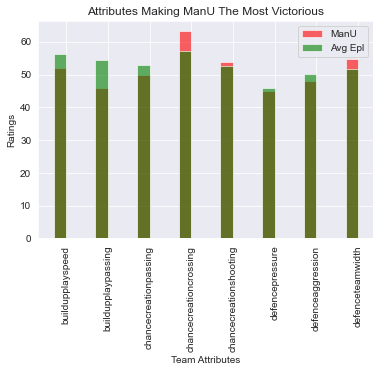

In [67]:
# Plotting & Comparing:

width = 0.3

ind = np.arange(len(man_united_att))

man_united_bars = plt.bar(ind, man_united_att, width, color="r", alpha=0.6, label="ManU")

avg_epl_bars = plt.bar(ind, avg_epl_att, width, color="g", alpha=0.6, label="Avg Epl")

plt.xlabel("Team Attributes")

plt.ylabel("Ratings")

plt.title("Attributes Making ManU The Most Victorious")

locations = ind + width/2

labels = man_united_att.index



plt.xticks(locations, labels, rotation="vertical")

plt.legend()

#### From the plot above, we can see that Manchester United clearly has more chance creation by crossing and defence team width than the avg of all epl teams 

### Research Question 6 : How did chance creation by shooting change over time ?

#### To answer the above question, i should group by date(years) and plot the average chance creation by shooting for all teams

In [68]:
# Converting date column dtype to datetime:

df_team_att["date"] = pd.to_datetime(df_team_att["date"])

In [69]:
# Extracting years:

df_team_att["date"] = df_team_att["date"].dt.year

In [70]:
# Checking:

df_team_att.head()

,id,team_fifa_api_id,team_name,date,buildupplayspeed,buildupplayspeedclass,buildupplaydribblingclass,buildupplaypassing,buildupplaypassingclass,buildupplaypositioningclass,...,chancecreationshooting,chancecreationshootingclass,chancecreationpositioningclass,defencepressure,defencepressureclass,defenceaggression,defenceaggressionclass,defenceteamwidth,defenceteamwidthclass,defencedefenderlineclass
0,1,434,FC Aarau,2010,60,Balanced,Little,50,Mixed,Organised,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,FC Aarau,2014,52,Balanced,Normal,56,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,FC Aarau,2015,47,Balanced,Normal,54,Mixed,Organised,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,Aberdeen,2010,70,Fast,Little,70,Long,Organised,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,Aberdeen,2011,47,Balanced,Little,52,Mixed,Organised,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


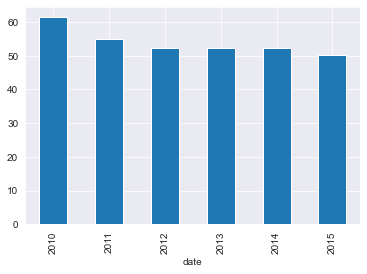

In [71]:
# plotting:

df_team_att.groupby("date")["chancecreationshooting"].mean().plot(kind="bar");

> **As we see above, shooting was very essential for chance creation in 2010, it became less important in 2011, stable from 2012 to 2014 and then decreased again in 2015**

<a id='conclusions'></a>
## Conclusions

- The **fastest player** is **Theo Walcott.**
- The **best dribbler** is **Lionel Messi.**
- The **best free kick taker** is **Andrea Pirlo.**
- The **best player** is the **king Leo Messi.**
- Players with finishing less than 60 can either be good or average players, while only good players have finishing more than 60, and you can see top players with finishing more than 80.
- As long as the player has more ball control he gets better.
- Top Attackers have more sprint speed and ball control
- Top Defenders have more heading accuracy
- Having high short passing rate is essential to be a top player wether attacker or defender
- The top 5 English Premier League teams (most victorious) are ( **Manchester United, Chelsea, Manchester City, Arsenal and Tottenham**).
- Manchester United which is the most victorious in English Premier League has more chance creation by crossing and defence team width than the avg of all English Premier League teams.
- Shooting was very essential for chance creation in 2010, but it became less essential in the following 5 years due to the change in attacking strategies.